# Mandatory Assignment 2
### MAT-2201 Numerical Methods

Daniel Elisabethsønn Antonsen, UiT 

Importing libraries and modules to be used in this assignment

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
plt.style.use("seaborn-whitegrid")

## Problem 1

Let $\epsilon$ be a positive real number and consider the matrix 
$$
A = \begin{bmatrix}
1 & 2 \\
2 & 4 + \epsilon
\end{bmatrix}
$$

#### (a)

Here we are asked to apply the $PA = LU$ factorization (with partial pivoting) to matrix A.

The $PA = LU$ factorization is just $LU$ factorization with partial pivoting, that is the factorization using the row-exchanged version of matrix A.  
And so we want to find the row with the largest value in the first column and move this row to the top of matrix A. So since the matrix is given as
$$
A = \begin{bmatrix}
1 & 2 \\
2 & 4 + \epsilon
\end{bmatrix}
$$
we can see that the second row has the largest value in the first column, and so we exchange the rows using a permutation matrix $P$ to keep track of the cumulative permutations. And so now we get the matrix
$$
PA = \begin{bmatrix}
2 & 4 + \epsilon \\
1 & 2
\end{bmatrix}\ ,\ P = \begin{bmatrix}
0 & 1 \\
1 & 0
\end{bmatrix}
$$

We canv now factorization such that $A$ is written as a product of a lower triangular matrix $L$ and a upper triangular matrix $U$. We can use the permutation matrix to keep control of all cumulative permutations of rows, so 
$$
\begin{bmatrix}
2 & 4 + \epsilon \\
1 & 2
\end{bmatrix}
\rightarrow \frac12 \cdot row 1\ , row 2 - row 1 \rightarrow 
\begin{bmatrix}
2 & 4 + \epsilon \\
\frac12 & -\frac\epsilon2
\end{bmatrix}
$$

And so the matrix $L$ is given by using $1$'s on the diagonal and the permutations on the lower elements, so we get
$$
L = \begin{bmatrix}
1 & 0 \\
\frac12 & 1
\end{bmatrix}
$$

The matrix $U$ is the matrix found by Gaussian elimination, and so we get that the matrix is given by
$$
U = \begin{bmatrix}
2 & 4 + \epsilon \\
0 & -\frac\epsilon2
\end{bmatrix}
$$

And so the $PA = LU$ factorization is given by

$$
\boxed{
\begin{bmatrix}
0 & 1 \\
1 & 0
\end{bmatrix}
\begin{bmatrix}
1 & 2 \\
2 & 4 + \epsilon
\end{bmatrix}
= 
\begin{bmatrix}
1 & 0 \\
\frac12 & 1
\end{bmatrix}
\begin{bmatrix}
2 & 4 + \epsilon \\
0 & -\frac\epsilon2
\end{bmatrix}
}
$$




#### (b)

We are here asked to compute the condition number of matrix $A$, $cond(A)$, two times; both by using the infinity-norm and using the $2$-norm. What is the condition number when $\epsilon = 0.01$?

We start by computing the condition number using the infinity-norm $cond_{\infty} (A)$. Using this, then he condition number is defined as
$$
cond_{\infty} (A) = ||A||_{\infty} ||A^{-1}||_{\infty}
$$
where the infinity-norm, $||A||_{\infty}$, is defined, for an $n\times n$-matrix as the maximum sum of absolute row values. That is, it is defined by
$$
||A||_{\infty} = max(t_{ij}),\ t_{ij} = \sum_{j=1}^{n}|a_{ij}|\ ,\ for\ i=1, 2, 3, ..., n
$$
And so, the sum of absolute values of each row in $A$ is 
\begin{align*}
|1| + |2| &= 3 \\
|2| + |4+\epsilon| &= 6 + \epsilon
\end{align*}
And so, no matter the value of $\epsilon$, we get 
$$
||A||_{\infty} = 6 + \epsilon
$$

The inverse, $A^{-1}$ of a $2\times 2$-matrix is given by
$$
A = \begin{bmatrix}
a & b \\
c & d
\end{bmatrix}
,\ 
A^{-1} = \frac{1}{det(A)}\begin{bmatrix}
d & -b \\
-c & a
\end{bmatrix}
$$
And so, for our matrix $A$ we get

\begin{align*}
det(A) &= (1)(4 + \epsilon) - (2)(2)= 4 + \epsilon - 4 = \underline{\epsilon} \\

\Rightarrow A^{-1} &= \frac1\epsilon 
\begin{bmatrix}
4 + \epsilon & -2 \\
-2 & 1
\end{bmatrix}
= \underline{
\begin{bmatrix}
\frac{4 + \epsilon}{\epsilon} & -\frac2\epsilon \\
-\frac2\epsilon & \frac1\epsilon
\end{bmatrix}
}
\end{align*}

So the sum of absolute values for each row in matrix $A^{-1}$ is then

\begin{align*}
\bigg| \frac{4 + \epsilon}{\epsilon} \bigg| + \bigg| -\frac2\epsilon \bigg| &= \underline{\frac{6 + \epsilon}{\epsilon}} \\
\bigg| -\frac2\epsilon \bigg| + \bigg| \frac1\epsilon \bigg| &= \underline{\frac{3}{\epsilon}}
\end{align*}

And so no matter the value of $\epsilon$, we get
$$
||A^{-1}||_{\infty} = \frac{6 + \epsilon}{\epsilon}
$$

So the condition number, $cond_{\infty}$ is given as

\begin{align*}
cond_{\infty} (A) &= ||A||_{\infty} ||A^{-1}||_{\infty} \\
                  &= (6 + \epsilon) \left(\frac{6 + \epsilon}{\epsilon} \right) \\
                  &= \boxed{\frac{(6 + \epsilon)^2}{\epsilon}}
\end{align*}

If we now have that $\epsilon = 0.01$, we get that the condition number has the value of
$$
\boxed{cond_{\infty} (A) = 3612.01}
$$

Now that we have used the infinity-norm to compute the condition number of matrix $A$, then we can move on to computing using the $2$-norm, i.e. $||A||_{2}$. And so the condition number $cond_{2} (A)$ is defined using $2$-norm as
$$
cond_{2} (A) = ||A||_{2} ||A^{-1}||_{2}
$$
where $||A||_2 = \sqrt{\rho(A^{T}A)} = \sqrt{\rho(B)}$, $B = A^{T}A$. 

That is, the $2$-norm of matrix $A$ is the square root of the spectral radius of matrix $B$, which is the matrixmultiplication of $A$ and $A^{T}$. Spectral radius is simply speaking the maximal absolute value of the eigenvalues of a matrix.  
And so, we can find the $2$-norm of matrix $A$ by first computing the matrix $B$. Then finding it's eigenvalues and pick the largest absolute value of the eigenvalues. And so $||A||_2$ is the square root of this value.

So we start by computing $B$
$$
B = A^{T} A
$$
where $A = \begin{bmatrix} 1 & 2 \\ 2 & 4 + \epsilon \end{bmatrix}$

And so 
$$
B = \begin{bmatrix} 1 & 2 \\ 2 & 4 + \epsilon \end{bmatrix} \begin{bmatrix} 1 & 2 \\ 2 & 4 + \epsilon \end{bmatrix}
= \begin{bmatrix} 5 & 2\epsilon + 10 \\ 2\epsilon + 10 & \epsilon^2 + 8\epsilon + 20 \end{bmatrix}
$$

If $A$ is an $n\times n$-matrix and $x$ a non-zero $n$-dimensional real or complex vector. If we also have 
$$
Ax = \lambda x
$$
where $\lambda$ is some real of complex number. Then $\lambda$ is an eigenvalue and $x$ is the corresponding eigenvector.  
We can find the eigenvalues by computing the roots of the characteristic polynomial 
$$
det(\lambda I - A) = 0
$$
$I$ is the identity matrix, $I = \begin{bmatrix} 1 & & 0 \\ &\ddots& \\ 0 & & 1 \end{bmatrix}$. 

And so we can compute

\begin{align*}

det(\lambda I - A) &= \begin{vmatrix} \lambda - 5 & -2\epsilon - 10 \\ -2\epsilon - 10 & \lambda - \epsilon^2 - 8\epsilon - 20 \end{vmatrix} \\

&= (\lambda - 5)(\lambda - \epsilon^2 - 8\epsilon - 20) - (-2\epsilon - 10)(-2\epsilon - 10) \\
&= \lambda^2 - \lambda\epsilon^2 - 8\epsilon\lambda - 25\lambda + \epsilon^2 \\
&= \lambda^2 - \lambda(\epsilon^2 + 8\epsilon + 25) + \epsilon^2 = 0
\end{align*}

So further we have

\begin{align*}
\lambda_{\pm} = \underline{\frac{\epsilon^2 + 8\epsilon + 25 \pm \sqrt{(\epsilon^2 + 8\epsilon + 25)^2 - 4\epsilon^2}}{2}}
\end{align*}

Since $\epsilon > 0$, then the root will always be larger than zero $\forall \epsilon$. And so 
$$
\rho(B) = \underline{\frac{\epsilon^2 + 8\epsilon + 25 + \sqrt{(\epsilon^2 + 8\epsilon + 25)^2 - 4\epsilon^2}}{2}}
$$
And so the $2$-norm of matrix $A$ is given as
$$
||A||_2 = \sqrt{\rho(B)} = \sqrt{\frac{\epsilon^2 + 8\epsilon + 25 + \sqrt{(\epsilon^2 + 8\epsilon + 25)^2 - 4\epsilon^2}}{2}}
$$

Further we need to compute the $2$-norm of $A^{-1}$. To do this, we can use some simple matrix rules. And so we have 

\begin{align*}
(A^T A)x = \lambda x \Rightarrow (A^T A)^{-1} (A^T A) x = (A^T A)^{-1} \lambda x \\
\Rightarrow \frac1\lambda x = \lambda^{-1} x = (A^T A)^{-1} x
\end{align*}
And so, we only need to compute the inverse of the eigenvalues to find the eigenvalues for $A^{-1}$. This means that the eigenvaleus is given as
$$
\lambda_{\pm}^{-1} = \frac{2}{\epsilon^2 + 8\epsilon + 25 \pm \sqrt{(\epsilon^2 + 8\epsilon + 25)^2 - 4\epsilon^2}}
$$

Further we have that the max value will be the eigenvalue with the lowest denominator, and so
$$
\rho((A^T A)^{-1}) = \frac{2}{\epsilon^2 + 8\epsilon + 25 - \sqrt{(\epsilon^2 + 8\epsilon + 25)^2 - 4\epsilon^2}}
$$

And so the $2$-norm of matrix $A^{-1}$ is given as
$$
||A^{-1}||_2 = \sqrt{\frac{2}{\epsilon^2 + 8\epsilon + 25 - \sqrt{(\epsilon^2 + 8\epsilon + 25)^2 - 4\epsilon^2}}}
$$

We can compute now compute the condition number $cond_2 (A)$ by

\begin{align*}
cond_2 (A) &= ||A||_2 ||A^{-1}||_2 \\
&= \boxed{\sqrt{\frac{\epsilon^2 + 8\epsilon + 25 + \sqrt{(\epsilon^2 + 8\epsilon + 25)^2 - 4\epsilon^2}}{\epsilon^2 + 8\epsilon + 25 - \sqrt{(\epsilon^2 + 8\epsilon + 25)^2 - 4\epsilon^2}}}}
\end{align*}

Now we can use $\epsilon = 0.01$, which gives
$$
\boxed{cond_2 (A) = 2508.01}
$$



#### (c)

Here we are asked to use the result from (a) to solve the system $Ax = b$ where
$$
b = \begin{bmatrix}
2.9 \\
6.2
\end{bmatrix}
$$
Then what is the solution when $\epsilon = 0.01$? 

For solving the system 
$$
Ax = b
$$
we can start by multiplying the system with the matrix $P$, and so
$$
PAx = Pb 
= \begin{bmatrix}
0 & 1 \\
1 & 0
\end{bmatrix}
\begin{bmatrix}
2.9 \\
6.2
\end{bmatrix}
= \begin{bmatrix}
6.2 \\
2.9
\end{bmatrix}
$$
of if we factorize the system using the factorization found in (a), and so we get the system on the form
$$
LUx = Pb
$$
We can now solve the system
$$
1.\ Lc = Pb\ ,\ for\ c = \begin{bmatrix} c_1 & c_2 \end{bmatrix}^{T} \\
2.\ Ux = c\ ,\ for\ x = \begin{bmatrix} x_1 & x_2 \end{bmatrix}^{T}
$$

We start by computing $1.$ where $L$ is the lower triangular matrix found in (a), and so 

\begin{align*}
Lc &= Pb \\
\Rightarrow
\begin{bmatrix}
1 & 0 \\
\frac12 & 1
\end{bmatrix}
\begin{bmatrix}
c_1 \\
c_2
\end{bmatrix}
&= 
\begin{bmatrix}
6.2 \\
2.9
\end{bmatrix}
\end{align*}

And so 

\begin{align*}
\Rightarrow \underline{c_1 = 6.2} \\
\frac12 c_1 + c_2 &= 2.9 \Rightarrow \underline{c_2 = 2.9 - 3.1 = -0.2}
\end{align*}

Futher we can use
$$
c = \begin{bmatrix} 6.2 \\ -0.2 \end{bmatrix}
$$

to compute $2.$ where $U$ is the upper triangular matrix found in (a), and so

\begin{align*}
Ux &= c \\
\Rightarrow 
\begin{bmatrix}
2 & 4 + \epsilon \\
0 & -\frac\epsilon2
\end{bmatrix}
\begin{bmatrix} 
x_1 \\ 
x_2 
\end{bmatrix}
&=
\begin{bmatrix} 
6.2 \\ 
-0.2 
\end{bmatrix}
\end{align*}

And so we can start from the bottom and compute $x_2$ then compute $x_1$

\begin{align*}
-\frac\epsilon2 x_2 = -0.2 \Rightarrow \underline{x_2 = \frac{0.4}{\epsilon}} \\

2x_1 + (4 + \epsilon)x_2 &= 6.2 \\
2x_1 &= 6.2 - (4 + \epsilon)\left(\frac{0.4}{\epsilon} \right) \\
&= 6.2 - \frac{1.6}{\epsilon} - 0.4 \\
&= 5.8 - \frac{1.6}{\epsilon} \\

\Rightarrow \underline{x_1 = 2.9 - \frac{0.8}{\epsilon}}
\end{align*}

So the solution to this system is
$$
\boxed{x = \begin{bmatrix} 2.9 - \frac{0.8}{\epsilon} \\ \frac{0.4}{\epsilon} \end{bmatrix}}
$$

If now we have $\epsilon = 0.01$, then we get the solution
$$
\boxed{x = \begin{bmatrix} -77.1 \\ 40 \end{bmatrix}}
$$



#### (d)

If now the values for $b$, $2.9$ and $6.2$ is some measured values. And it turns out that a more precise measurement is given as
$$
b = \begin{bmatrix} 3 \\ 6 \end{bmatrix}
$$
Repeat (c) for new $b$. What is now the solution for $\epsilon = 0.01$? 

Here again we can solve the system 
$$
Ax = b
$$
by using the same procedure as in (c). And so we start på multiplying the matrix $P$ into the system, and so we get
$$
PAx = Pb = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} \begin{bmatrix} 3 \\ 6 \end{bmatrix}
= \begin{bmatrix} 6 \\ 3 \end{bmatrix} 
$$

And here again we can write $PA$ as the factorization $LU$ where $L$ is the lower triangular matrix and $U$ is the upper triangular matrix. So we need to solve the system
$$
1.\ Lc = Pb \\
2.\ Ux = c
$$

We start by computing the first equation, and so

\begin{align*}
Lc &= Pb \\
\Rightarrow 
\begin{bmatrix}
1 & 0 \\
\frac12 & 1 
\end{bmatrix}
\begin{bmatrix}
c_1 \\
c_2
\end{bmatrix}
&= 
\begin{bmatrix}
6 \\ 
3
\end{bmatrix}
\end{align*}

which gives 
\begin{align*}
c_1 &= \underline{6} \\
\frac12 c_1 + c_2 &= 3 \Rightarrow c_2 = 3 - \frac12 (6) = \underline{0}
\end{align*}

so the vector $c$ is given by 
$$
c = \begin{bmatrix} 6 \\ 0 \end{bmatrix}
$$

We can now continue by computing 

\begin{align*}
Ux &= c \\
\Rightarrow 
\begin{bmatrix}
2 & 4 + \epsilon \\
0 & -\frac\epsilon2
\end{bmatrix}
\begin{bmatrix}
x_1 \\ x_2
\end{bmatrix}
&=
\begin{bmatrix}
6 \\ 0
\end{bmatrix}
\end{align*}

which gives 
\begin{align*}
-\frac\epsilon2 x_2 = 0 \Rightarrow \underline{x_2 = 0}
2x_1 + (4 + \epsilon) x_2 &= 6 \\
2x_1 + (4 + \epsilon) (0) &= 6 \\
2x_1 &= 6 \Rightarrow \underline{x_2 = 3} 
\end{align*}

So the solution to the system is 
$$
\boxed{x = \begin{bmatrix} 3 \\ 0 \end{bmatrix}}
$$

When $\epsilon = 0.01$, then the solution to the system is unchanged. 

#### (e)

If we denote the solution from (c) 
$$
x_a = \begin{bmatrix} -77.1 \\ 40 \end{bmatrix}
$$

and the solution from (d) is denoted 
$$
x_0 = \begin{bmatrix} 3 \\ 0 \end{bmatrix}
$$

$x_a$ is the approximated solution for the system 
$$
Ax = b
$$
with
$$
\epsilon = 0.01,\ A = \begin{bmatrix} 1 & 2 \\ 2 & 4.01 \end{bmatrix},\ b = \begin{bmatrix} 3 \\ 6 \end{bmatrix}
$$

We can compute using both infinity-norm and $2$-norm. We start by using the infinity-norm. And so the backward error can be computed by
$$
||b - Ax_a ||_{\infty} \\
$$
$$
Ax_a = \begin{bmatrix} 1 & 2 \\ 2 & 4.01 \end{bmatrix} \begin{bmatrix} -77.1 \\ 40 \end{bmatrix} = 
\begin{bmatrix} 2.9 \\ 6.2 \end{bmatrix}
$$
And so the backwards error using the infinity-norm is given as
$$
||b - Ax_a||_\infty = ||\begin{bmatrix} 3 \\ 6 \end{bmatrix} - \begin{bmatrix} 2.9 \\ 6.2 \end{bmatrix}||_\infty
= ||\begin{bmatrix} 0.1 \\ -0.2 \end{bmatrix}||_{\infty} = \boxed{0.2}
$$

The forward error using the infinity-norm is given by 
$$
||x_0 - x_a||_\infty 
$$
And so
$$
||\begin{bmatrix} 3 \\ 0 \end{bmatrix} - \begin{bmatrix} -77.1 \\ 40 \end{bmatrix}||_\infty 
= ||\begin{bmatrix} 80.1 \\ -40 \end{bmatrix}||_\infty = \boxed{80.1}
$$

To comnpute the corresponding error magnification factor, we must first compute the relative backward error and the relative forward error using the infinity-norm. The backward error is defined as 
$$
\frac{||b - Ax_a||_\infty}{||b||_\infty}
$$

And so we get 
$$
\frac{||b - Ax_a||_\infty}{||b||_\infty} = \frac{0.2}{||\begin{bmatrix} 3 \\ 6 \end{bmatrix}||_\infty} = \frac{0.2}{6} \approx \underline{0.0333}  
$$

And the relative forward error is given by
$$
\frac{||x_0 - x_a||_\infty}{||x_0||_\infty}
$$

And so we get that the relative forward error is 
$$
\frac{||x_0 - x_a||_\infty}{||x_0||_\infty} = \frac{80.1}{||\begin{bmatrix} 3 \\ 0 \end{bmatrix}||_\infty} = 
\frac{80.1}{3} = \underline{26.7}
$$

We can now compute the error magnification factor for the system $Ax = b$, which is defined using infinity-norm as 
$$
error\ mf = \frac{relative\ forward\ error}{relative\ backward\ error} = \frac{\frac{||b - Ax_a||_\infty}{||b||_\infty}}{\frac{||x_0 - x_a||_\infty}{||x_0||_\infty}}
$$

And so the error magnification factor is 
$$
\frac{26.7}{0.0333} = \boxed{801.802}
$$

In (b) we found that the condition number using the infinity-norm is $3612.01$, and the condtion number tells us the maximal error magnification factor. And here we get a value that is well below the maximum, but in fact still high. And so a small change in value, will mean a large difference in answers.

Now we will do the same computations using the $2$-norm. The backward error is defined as 
$$
||b - Ax_a||_2
$$
$$
b - Ax_a = \begin{bmatrix} 3 \\ 6 \end{bmatrix} - \begin{bmatrix} 2.9 \\ 6.2 \end{bmatrix} = \begin{bmatrix} 0.1 \\ -0.2 \end{bmatrix}
$$

The $2$-norm of a given vector $x = \begin{bmatrix} x_1 & x_2 & \dots & \end{bmatrix}^T$ is defined as 
$$
||x||_2 = \sqrt{x_1^2 + x_2^2 + \dots}
$$
This is also called the Euclidean norm. And so the backward error is 
$$
||b - Ax_a||_2 = ||\begin{bmatrix} 0.1 \\ -0.2 \end{bmatrix}||_2 = \sqrt{(0.1)^2 + (-0.2)^2} = \boxed{0.2236}
$$

Further we can compute the forward error, which is defined as 
$$
||x_0 - x_a||_2
$$
and so the forward error is then 
$$
\Rightarrow ||\begin{bmatrix} 3 \\ 0 \end{bmatrix} - \begin{bmatrix} -77.1 \\ 40 \end{bmatrix}||_2
= ||\begin{bmatrix} 80.1 \\ -40 \end{bmatrix}||_2 = \sqrt{(80.1)^2 + (-40)^2} = \boxed{89.523}
$$

Here again we need to find the  relative backward error and the relative forward error.  
And so 
$$
\frac{||b - Ax_a||_2}{||b||_2}
$$
$$
||b||_2 = ||\begin{bmatrix} 3 \\ 6 \end{bmatrix}||_2 = \sqrt{3^2 + 6^2} = \underline{6.708}
$$

And the relative forward error is given as 
$$
\frac{||x_0 - x_a||_2}{||x_0||_2}
$$
$$
\Rightarrow ||x_0||_2 = ||\begin{bmatrix} 3 \\ 0 \end{bmatrix}||_2 = \underline{3}
$$
And so the error magnification factor is given as 
$$
error\ mf = \frac{\frac{||x_0 - x_a||_2}{||x_0||_2}}{\frac{||b - Ax_a||_2}{||b||_2}} = \frac{\frac{89.523}{3}}{\frac{0.2236}{6.708}} = \boxed{895.32}
$$

Here again the value is well below the condition number, which checks out since the condition number is the maximal error magnification factor.


#### (f)

Using the $LU$-factorization we can transform a system into easier and simpler ways of calculating if we have different $b$ vectors. And some systems of the form $Ax = b$ is very sensitive to initial changes in the output $b$. A small change in $b$ can lead to very different results for the vector $x$.



## Problem 2

Consider a set of data points $\{(x_1, y_1),... ,(x_N, y_N)\}$. Suppose that the relationship between the $x$'s and $y$'s can be expressed as $y_i = g_k (x_i)$, where $k$ is a parameter.



#### (a)

Here we are given the following function, which is a modification of the Mean Squared Error:
$$
F(k) = \frac{1}{N}\sum_{i=1}^{N} (y_i - g_k (x_i))^4
$$
What does this function represent? What is the meaning of its minimum? 

Since this is a modification of the Mean Squared Error, then it is just the double squared mean error. And so it describes the relationship between between the $x$'s and $y$'s. The minimum describes the the minimum error between the $x$'s and $y$'s.


#### (b)

From now on,m we will assume that $g_k (x) = kx$. Using this, we are asked to compute the derivative of $F(k)$ with respect to $k$. 
$$
f(k) = \frac{\partial F}{\partial k}(k)
$$

And so we can compute

\begin{align*}
\frac{\partial F}{\partial k}(k) &= \frac{\partial}{\partial k}\left(\frac{1}{N}\sum_{i=1}^{N}(y_i - kx_i)^4 \right) \\
&= \frac{1}{N}\sum_{i=1}^{N}\frac{\partial}{\partial k} (y_i - kx_i)^4 \\
&= \frac{1}{N}\sum_{i=1}^{N} 4(y_i - kx_i)^3 (-x_i) \\
&= -\frac{4}{N}\sum_{i=1}^{N} x_i(y_i - kx_i)^3
\end{align*}
And so the derivative of $F(k)$ is given as
$$
\boxed{f(k) = \frac{\partial F}{\partial k}(k) = -\frac{4}{N}\sum_{i=1}^{N} x_i(y_i - kx_i)^3}
$$



#### (c)

Let us now condsider $N = 5$ and the data points given below with 

In [3]:
# Defining each data point given in the problem
x1, y1 = -0.14636714, -0.01101692
x2, y2 = 1.03206087, 0.46129383
x3, y3 = 1.87784546, 0.96929284
x4, y4 = 2.9766235, 1.40264061
x5, y5 = 3.79677605, 2.0512337
# Creating array to hold all data points 
data_points = np.array([[x1, y1], [x2, y2], [x3, y3], [x4, y4], [x5, y5]])

We are asked to use Newton's method to find an approximation of the minimum $\bar{k}$ of the function $F(k)$, that is when the derivative $f(k) = 0$. We are asked to have a table with all intermediate results along with the errors $e_i = |k_i - r|$ and both ratios $e_i/e_{i-1}$ and $e_i/e_{i-1}^2$.

The Newton's method or also called Newton-Raphson method is a method that usually converges faster than linearly convergent methods. This method finds the root of function on the form $f(x) = 0$, where we start by guessing a initial value for the root and use the tangent line at the point $(x_0, f(x_0))$ where $x_0$ is our initial guessed value. The $x$-value where the tangeng line intersects the $x$-axis, is our new value for the approximated root. Doing this over again will yield a better and more accurate approximation, and so we iterate over several values for $x$.  

We can find a formula for Newton-Raphson method by considering the formula for point-slope for a point $(x_0, f(x_0))$, given as
$$
y - f(x_0) = f'(x_0)(x - x_0)
$$
Setting $y = 0$ and solve for $x$ gives us the approximation for the root
$$
x = x_0 - \frac{f(x_0)}{f'(x_0)}
$$

And so the iterative Newton-Raphson method has the formula 
$$
x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)},\ for\ x = 0, 1, 2, ...
$$

As we can see from the fomula for the Newton-Raphson method, we need both the function $f(k)$ and its derivative. The function is found in (b), but we need to compute the derivative of $f(k)$ before we can implement it using python. And so we have to
$$
f'(k) = \frac{\partial^2}{\partial k^2}F(k)
$$

\begin{align*}
\Rightarrow f'(k) &= \frac{\partial}{\partial k} \left(-\frac{4}{N}\sum_{i=1}^{N} x_i(y_i - kx_i)^3\right) \\
&= -\frac{4}{N}\sum_{i=1}^{N} \frac{\partial}{\partial k}\left(x_i (y_i - kx_i)^3\right) \\
&= -\frac{12}{N}\sum_{i=1}^{N} x_i(y_i - kx_i)^2 (-x_i) \\
&= \underline{\frac{12}{N}\sum_{i=1}^{N} x_i^2(y_i - kx_i)^2}
\end{align*}

Now that we have both the function $f(k)$ and it's derivative $f'(k)$, we can implement these. This is done below using the data points and $N = 5$

In [4]:
# Defining arrays for x and y values given in the problem
x = data_points[:, 0]
y = data_points[:, 1]
# Defining function f and derivative of f
f = lambda k: -(4 / 5) * np.sum(x * (y - k * x)**3)
df = lambda k: (12 / 5) * np.sum(x**2 * (y - k * x)**2)

We can now implement a function to compute the iterative Newton-Raphson method, the error and both the ratios.

In [5]:
def Newton_Raphson(f, df, k0:float, tol:float, iter:int):
    """
    Function for compute the Newton-Raphson method 

    Input:
        f: function, function we want to find the root for
        df: function, derivate of the function f
        k_0: float, initial guess value for root
        tol: float, 
        iter: int, total number of iterations to avoid infinite loop
    
    Output:
        k_array: np.ndarray, array containing all intermediate values for k
        f_array: np.ndarray, array containing all intermediate values for f
    """
    k = k0
    k_array = np.zeros((iter))
    f_array = np.zeros((iter))
    # Setting inital guess for root and it's f(k) value
    k_array[0] = k
    f_array[0] = f(k)
    for i in range(1, iter):
        if df(k) == 0:
            raise ZeroDivisionError(f"We can not divide by zero, this occurs when k = {k}")
        # Computing the new k value
        k = k - f(k)/df(k)
        # Adding values to arrays 
        k_array[i] = k
        f_array[i] = f(k)
        # Stop the loop if our value is below the tolerance
        if abs(f(k)) < tol:
            # Slicing away the unused elements of both arrays 
            k_array = k_array[:i+1]
            f_array = f_array[:i+1]
            break
        
    return k_array, f_array

Now that we have defined a function for the Newton-Raphson method, we can use this to compute the approximated value for $k$, that is $\bar{k}$. Further we are also asked to compute the error, $e_i = |k_i - r|$ where r is the root. Here we are asked to estimate without knowing the exact value for the root. And so what we can do is to compute a good approximation for the root, and then compute the error using this approximation for the root.  
And so, we use the last value for the approximated value of $k$ from Newton-Raphson method as the value for our root $r$. By using this value, we can now compute the error and the ratios. 

In [6]:
# Calling the method function defined above 
k_values, _ = Newton_Raphson(f, df, 1, 5E-9, 20)
# Defining the value for the root
root1 = k_values[-1]

def error(k:np.ndarray, r:float):
    """
    Function for computing the errors and the ratios

    Input:
        k: np.ndarray, array containing all intermediate values for k
        r: float, our value for the root
    """
    # Computing error e_i
    e_i = np.abs(k - r)
    # Creating arrays for holding ratio values
    lin_ratio = np.zeros(len(e_i))
    quad_ratio = np.zeros(len(e_i))
    # Setting the first element of the ratios as NaN (not a number)
    lin_ratio[0] = np.NaN
    quad_ratio[0] = np.NaN
    for i in range(1, len(e_i)):
        lin_ratio[i] = e_i[i] / e_i[i-1]
        quad_ratio[i] = e_i[i] / (e_i[i-1]**2)
    
    return e_i, lin_ratio, quad_ratio

Now that we have all the arrays we need, then we can plot a table containing $k_i$, $e_i = |k_i - r|$, $e_i / e_{i-1}$ and $e_i / e_{i-1}$. And so

In [7]:
# Calling the error function
e, r1, r2 = error(k_values, root1)
# Using pandas to create a table of the values
dataf = pd.DataFrame(np.array([k_values, e, r1, r2]).T, 
                    columns = ["k_i", "e_i = |k_i - r|", "e_i/e_i-1", "e_i/e_i-1^2"])
dataf.style

,k_i,e_i = |k_i - r|,e_i/e_i-1,e_i/e_i-1^2
0,1.000000,0.489079,nan,nan
1,0.838950,0.328029,0.670708,1.371370
2,0.730891,0.219970,0.670580,2.044270
3,0.657776,0.146855,0.667614,3.035030
4,0.607341,0.096420,0.656564,4.470840
5,0.571012,0.060091,0.623223,6.463653
6,0.542517,0.031595,0.525790,8.749912
7,0.518886,0.007965,0.252084,7.978548
8,0.510608,0.000313,0.039333,4.938466
9,0.510920,0.000001,0.003071,9.802863


#### (d)

Can we tell if the method converges linearly or quadratically by only considering the table found in (c)? We are asked to explain why.

We can see from the table above, more precise the result from the error $e_i$ that when the convergence start to set in, then the number of correct decimal places in the approximation of $k$, $k_i$ approximatly doubles for each iteration. This indicated that the method converges quadratically.

We can also check using theorem $1.11$ from the book, which states
>Lef $f$ be a twice continuously differentiable and $f(r) = 0$. If $f'(r) \neq 0$, then Newton-Raphson method is locally and quadratically convergent to $r$.

And so, we can use the derivative of our function $f(k)$, which is defined in (c) to compute the value of the derivative at the approximation of the root $r$. And so, we get 

In [8]:
# Printing value for f'(k) at k = r
print(f"r = {root1}")
print(f"The value of f'(r) = {df(root1)}")

r = 0.5109213575373539
The value of f'(r) = 0.7383572821531348


As we can see, the value of the derivative $f'(k) \neq 0$ at the estimatet value for the root, and thus the method is locally and quadratically convergent to the estimated root for $k$, denoted $\bar{k}$.

#### (e)

Here we asked what the multiplicity of the root $\bar{k}$ of $f(k)$, and if it is possible to use the Modified Newton's Method to find a good approximation of $\bar{k}$ in less iterations. 

The multipicity of a root is found by checking the value of the first derivative, second derivative, and so on, at the root. If the value is zero we continue to check until we have a derivative which does not have the value zero. If now the amount of zero derivatives at the root $r$ is $m-1$, then the multiplicity of the root $r$ is $m$. 

We have computed the derivative of $f(k)$ at the estimated root $\bar{k}$, which is not equal to zero. And so the multipicity of root $\bar{k}$ is $1$, and the root is then called **simple**.

For us to use the Modified Newton's Method, then we need to have a multiplicity $> 1$. And since we here have a multiplicity of one, then it is not possible to use the Modified Newton's Method to find an approximation of the root $\bar{k}$ which is found in less iterations.


#### (f)

We are here asked to repeat what we did in (c), but now use the Mean Squared Error defined as 
$$
MSE(k) = \frac{1}{N}\sum_{i=1}^{N} (y_i - g_k(x_i))^2
$$
In other word, we are asked to find the minimum $\tilde{k}$ for the Mean Squared Error function by applying the Newton-Raphson method to the functions derivative $MSE'(k)$. 

First we have to compute the derivative of the Mean Squared Error function, and so

\begin{align*}
MSE'(k) &= \frac{\partial}{\partial k}\left(\frac{1}{N} \sum_{i=1}^{N} (y_i - kx_i)^2\right) \\
&= \frac{1}{N} \sum_{i=1}^{N} \frac{\partial}{\partial k}\left(y_i - kx_i)^2\right) \\
&= \frac{1}{N} \sum_{i=1}^{N} 2(y_i - kx_i)(-x_i) \\
&= \underline{-\frac{2}{N} \sum_{i=1}^{N}y_i x_i - k x_i^2}
\end{align*}

And we also need the second derivative of $MSE(k)$, and so

\begin{align*}
MSE''(k) &= \frac{\partial}{\partial k}\left(-\frac{2}{N} \sum_{i=1}^{N}y_i x_i - k x_i^2\right) \\
&= -\frac{2}{N} \sum_{i=1}^{N} \frac{\partial}{\partial k}\left(y_i x_i - k x_i^2 \right) \\
&= -\frac{2}{N} \sum_{i=1}^{N} -x_i^2 \\
&= \underline{\frac{2}{N} \sum_{i=1}^{N} x_i^2}
\end{align*}

We can now implement the functions found above

In [9]:
# Implementing the functions found above
f2 = lambda k: -(2 / 5) * np.sum(y * x - k * x * x)
df2 = lambda k: (2 / 5) * np.sum(x * x)

We can now compute an approximation $\tilde{k}$ using Newton-Raphson method defined in (c), and compute the error which is also defined in (c)

In [37]:
# Runing Newton-Raphson method
ktild_values, _ = Newton_Raphson(f2, df2, 1, 5E-9, 20)
# Defining the best approximation for k, k_tilde
k_tilde = ktild_values[-1]
# Finding error
e2, rt1, rt2 = error(ktild_values, k_tilde)

0.5113576499969703

We can now create a table, same as we did in (c)

In [11]:
# Using pandas to create a table of the values
dataf2 = pd.DataFrame(np.array([ktild_values, e2, rt1, rt2]).T, 
                    columns = ["k_i", "e_i = |k_i - r|", "e_i/e_i-1", "e_i/e_i-1^2"])
dataf2.style

,k_i,e_i = |k_i - r|,e_i/e_i-1,e_i/e_i-1^2
0,1.000000,0.488642,nan,nan
1,0.511358,0.000000,0.000000,0.000000


Here it is very clear that we have convergence after only one iteration. The reason for this is that Newton-Raphson method uses a linear tangent in at the point $(x_0, f(x_0))$ and the function $RME'(k)$ is a linear function. And so we will create a parallell line on top of the function which of course will intersect the axis at the precise same point.

#### (g)

Here we are asked to plot the data points together with the functions $g_{\bar{k}} (x_i)$ and $g_{\tilde{k}} (x_i)$, where $\bar{k}$ is the estimated root found in (e) and $\tilde{k}$ is the estimated root in (f).

First we define the functions for $g_{\bar{k}} (x_i)$ and $g_{\tilde{k}} (x_i)$

In [38]:
# Using a 
g_bar = np.array([root1 * i for i in data_points[:, 0]])
g_tilde = np.array([k_tilde * i for i in data_points[:, 0]])
g_tilde

array([-0.07484596,  0.52775222,  0.96025064,  1.5221192 ,  1.94151048])

These can now be plotted together with the points, and so

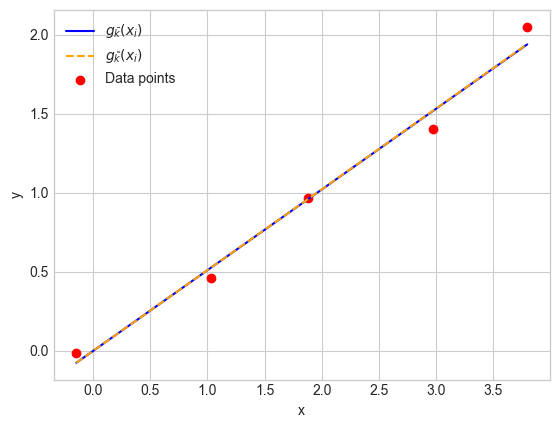

In [40]:
plt.plot(data_points[:, 0], g_bar, color="blue", label=r"$g_{\bar{k}}(x_i)$")
plt.plot(data_points[:, 0], g_tilde, color="orange", label=r"$g_{\tilde{k}}(x_i)$", linestyle="--")
plt.scatter(data_points[:, 0], data_points[:, 1], color="red", label="Data points")
plt.xlabel(r"x")
plt.ylabel(r"y")
plt.legend()
plt.show()

Based on the plot, we can see that both functions follows the point very good. And so, both are good estimates.

## Problem 3

In this problem, we are going to find an "approximate solution" to the initial value problem 

\begin{equation}
y'(x) = -y(x),\ \ \ y(0) = 1
\end{equation}
on the interval $[0, 1]$ by converting it into a system of linear (algebraic) equations.

#### (a)

We are aksed to divide the interval $[0,1]$ into three subintervals $[x_0, x_1]$, $[x_1, x_2]$ and $[x_2, x_3]$, each with the length of $h$ which is equal for each interval. What are then the numerical values for $x_0$, $x_1$, $x_2$, $x_3$ and $h$?

We can use the numpy module in python, and divide an interval into three subintervals. 

In [14]:
# Diving interval into 4 points with equal length
interval = np.linspace(0, 1, 4)
x_0, x_1, x_2, x_3 = interval[0], interval[1], interval[2], interval[3]
# Finding the length h
h = np.diff(interval)[0]

And so the values are: $x_0 = 0.0$, $x_1 = 0.3333333333333333$ or $x_1 = 1/3$, $x_2 = 0.6666666666666666$ or $x_2 = 2/3$, $x_3 = 1.0$  
and the length $h = 0.3333333333333333$ or $h = 1/3$. 

#### (b)

We are here going to use the approximation for the derivative given by 
$$
f'(x) \approx \frac{f(x + h) - f(x)}{h}
$$
We are to apply this approximation to the function $y(x)$ and use $(1)$ to explain that we get the approximated equations given in hte problem.

If we use the approximation for the derivative for the function $y(x)$ we get
$$
y(x) \approx \frac{y(x + h) - y(x)}{h}
$$
We can now use this for each subinterval, and so we start by considering the point $x_0$ which has the approximated derivative given by  

\begin{align*}
y'(x_0) \approx \frac{y(x_0 + h) - y(x_0)}{h}
\end{align*}
But here we can notice that the point $x_0$ has the value $0$, and so we can use the initial value given in the problem $y(x_0) = y(0) = 1$ and that $y'(x) = -y(x)$, and thus we can use 
$$
y'(x_0) = -y(x_0) = -y(0) = -1
$$
Further we can notice that $h = 1/3$, and so $y(x_0 + h)$ can be rewritten as
$$
y(x_0 + h) = y(0 + 1/3) = y(1/3) = y(x_1)
$$
Using all these, we can rewrite the approximated derivative for $x_0$ as 
$$
\boxed{\frac{y(x_1) - y(x_0)}{h} \approx -1}
$$

We can now consider $x_1$ which has the appriate derivative given as
$$
y'(x_1) \approx \frac{y(x_1 + h) - y(x_1)}{h}
$$
Here again we can use the same, but $x_1$ has the value $1/3$. And so we can rewrite $y'(x_1)$ as
$$
y'(x_1) = -y(x_1)
$$
We can here use the value for $h$ and rewrite $y(x_1 + h)$ by
$$
y(x_1 + h) = y(1/3 + 1/3) = y(2/3) = y(x_2)
$$
And so the approximation for the derivative is given as 
$$
\boxed{\frac{y(x_2) - y(x_1)}{h} \approx -y(x_1)}
$$

And now we can consider $x_2$ which has the approximated derivative given by
$$
y'(x_2) \approx \frac{y(x_2 + h) - y(x_2)}{h}
$$
And so, using the same procedure as for the two points above. Here $x_2$ has the value $2/3$ and again $y'(x) = -y(x)$, and thus we get 
$$
y'(x_2) = -y(x_2) 
$$
Again we can rewrite $y(x_2 + h)$ by
$$
y(x_2 + h) = y(2/3 + 1/3) = y(1) = y(x_3)
$$
And so the approximation for the derivative can be written as
$$
\boxed{\frac{y(x_3) - y(x_2)}{h} \approx -y(x_2)}
$$

And so, now we have explained that we get the equations given in the problem.

#### (c)

We will now pretend that the approximations above are exact. We will further use the notation $y_i = y(x_i)$ for $i = 0, 1, 2, 3$ and show that $y_1$, $y_2$ and $y_3$ must satisfy the system $Ay = b$ with
$$
A = \begin{bmatrix} 1 & 0 & 0 \\ h - 1 & 1 & 0 \\ 0 & h - 1 & 1 \end{bmatrix},\ \ y = \begin{bmatrix} y_1 \\ y_2 \\ y_3 \end{bmatrix},\ \ b = \begin{bmatrix} 1 - h \\ 0 \\ 0 \end{bmatrix}
$$
We are also asked to explaine why this system has a unique solution $y$.

To show this, we can start by considering the equations found in the previous problem, given as

\begin{align*}
(1)\ \frac{y(x_1) - y(x_0)}{h} &= -1 \\
(2)\ \frac{y(x_2) - y(x_1)}{h} &= -y(x_1) \\
(3)\ \frac{y(x_3) - y(x_2)}{h} &= -y(x_2)
\end{align*}
We can further rearange these three so all $y$'s are on the left side, and so we start by considering $(1)$ where we notice $y(x_0) = y_0 = 1$ and so

\begin{align*}
\frac{y_1 - y_0}{h} &= -1 \\
\frac{y_1 - 1}{h} &= -1 \\
y_1 - 1 &= -h \\
\underline{y_1 + 0\cdot y_2 + 0\cdot y_3 = 1 - h}
\end{align*}
We can now consider $(2)$ and do the same computations

\begin{align*}
\frac{y_2 - y_1}{h} &= -y_1 \\
y_2 - y_1 &= -h y_1 \\
h y_1 - y_1 + y_2 &= 0 \\
\underline{(h - 1)y_1 + y_2 + 0\cdot y_3 = 0}
\end{align*}

And so, now we will consider the last equation $(3)$ and do the same as for the previous equations 

\begin{align*}
\frac{y_3 - y_2}{h} &= -y_2 \\
y_3 - y_2 &= -h y_2 \\
hy_2 - y_2 + y_3 &= 0 \\
\underline{0\cdot y_1 + (h-1)y_2 + y_3 = 0}
\end{align*}

Combining this, we get a system of equations which has matrix form as the system given in the problem. This is easy to see.

To explain why this system has a unique solution, then we can use theorem $2.10$ and $2.11$ from the book which states
> If $n\times n$ matrix $A$ is strictly diagonally dominant, then 
> $(1)$ $A$ is a nonsingular matrix, and 
> $(2)$ for every vector $(b)$ and every starting guess, the Jacobi or the Gauss-Seidel method applied on the system $Ax = b$ converges to a (unique) solution.

That the matrix is strictly diagonally dominant simply means that the dominant value in each row is located on the diagonal, or the abolsute value for the value at the diagonal is greater than the sum of absolute values for all other values in the row.  
That is, for each $1 \leq n \leq n$, $|a_{ii}| > \sum_{i \neq j} |a_{ij}|$. 

If we use the value found for $h = 1/3$, we get that this is true for this matrix $A$, and thus the system has a unique solution.

#### (d)

We are here asked to solve the system given in (c) using the Jacobi or the Gauss-Seidel method with initial guess $(1, 1, 1)$. We are then going to argue, using a known theorem, that the method converges to the unique solution $y$.

We can solve the system with either the Jacobi or the Gauss-Seidel method, both which are iterative methods and are in fact closely realated to each other. The only difference between the two methods is that the Gauss-Seidel method uses the most recent updated values for the unknowns at each step, even if the updating happens at the current step. 

Here we will use the Gauss-Seidel method, and thus it will be the only method considered. 

The Gauss-Seidel method is as stated earlier, an iterative method for solving a linear system. If we consider a matrix $A$, which can be split into three new matrices $D$, $U$ and $L$. Where $D$ is a diagonal matrix, $U$ is an upper triangular matrix and $L$ is an lower triangular matrix.

We can further rewrite the system to
$$
(D - U - L)x = b
$$
which can be isolated as 
$$
(L + D)x_{k + 1} = -Ux_{k} + b
$$
Further rearanging gives the matrix equation
$$
x_{k + 1} = D^{-1} (b - Ux_k - Lx_{k + 1})
$$
for $k = 0, 1, 2, 3, ...$

In our case, $x = y$.

And so by implementing this into code, then we can solve the system numerically. We start by defining the mtraix $A$, vector $x_0$ which is our initial guessed values and the vector $b$ all using the value for $h$ found before.

In [22]:
# Matrix A
A = np.array([[1, 0, 0], 
            [h - 1, 1, 0], 
            [0, h - 1, 1]])
# Vector for initial values
inital = np.array([[1],
                   [1],
                   [1]])
# Vector b
b = np.array([[1 - h],
              [0], 
              [0]])

We can further define a function to compute the Gauss-Seidel method, this is done below.

In [36]:


def Gauss_Seidel(A:np.ndarray, y0:np.ndarray, b:np.ndarray, tol:float, iter:int=1000):
    """
    Function for computing a system of equations using Gauss-Seidel method
    Sytem of the form Ay = b.

    Input:
        A: np.ndarray, array of matrix A
        y0: np.ndarray, array containg inital y values
        b: np.ndarray, array containing vector b
        tol: float, tolerance level of error
        iter: int, number of iterations
    """
    y = y0
    # Creating the lower and upper triangular matricies and the 
    L = np.tril(A) - np.identity(A)
    U = np.triu(A)





array([[ 0.        ,  0.        ,  0.        ],
       [-0.66666667,  0.        ,  0.        ],
       [ 0.        , -0.66666667,  0.        ]])